Второе домашнее задание по Компьютерному зрению.
<br>Описание:
<ul>
<li>Вход: цветное изображение
<li>Свёртка с 5 фильтрами 3*3*3 (случайные числа)
<li>Нормализация (коэффициенты и смещение произвольные)
<li>ReLU
<li>MAX POOLING (2*2)
<li>Попиксельный SoftMax
<li>Выход: 5 каналов
</ul>

<h1>Вход: цветное изображение</h1>

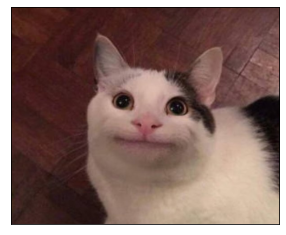

In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random as rnd
%matplotlib inline

def imshow(img):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    pass

img = Image.open("Cat.jpg")
imshow(img)

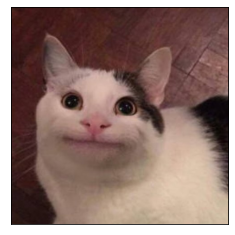

In [2]:
width = img.size[0]
height = img.size[1]
img = img.crop( (width-height,0,width,height) )
imshow(img)

In [3]:
img = np.array(img)
w_input, h_input, _ = img.shape
img.shape

(485, 485, 3)

<h1>Свёртка с 5 фильтрами 3*3*3 (случайные числа)</h1>

In [4]:
many_filters = list()
M = 5
R = 3
S = 3
C = 3
for i in range(M):
    filter = np.zeros((R,S,C), dtype=np.float32)
    for j in range(R):
        for k in range(S):
            for z in range(C):
                filter[j,k,z] = rnd.random()
    many_filters.append(filter)

many_filters = np.array(many_filters)

many_filters.shape

(5, 3, 3, 3)

In [5]:
w_output = w_input - 2
h_output = h_input - 2

output = np.zeros((M, w_output, h_output))

for m in range(M):
    for x in range(w_output):
        for y in range(h_output):
            for i in range(R):
                for j in range(S):
                    for k in range(C):
                        output[m][x][y] += img[x + i][y + j][k] * many_filters[m][i][j][k]
                        
output.shape

(5, 483, 483)

In [6]:
output

array([[[ 504.42397308,  500.36570045,  504.84004664, ...,
          834.69696486,  819.38640565,  810.28147554],
        [ 534.70498413,  520.79747248,  517.59916508, ...,
          859.59017795,  845.01428258,  834.56106508],
        [ 572.91624543,  550.07948118,  533.65851936, ...,
          894.60028625,  883.06351572,  873.03244501],
        ...,
        [ 447.76997665,  443.5929766 ,  440.39766073, ...,
         2660.00565147, 2656.81032658, 2651.01248264],
        [ 461.85837728,  456.07461509,  451.24432901, ...,
         2672.4873507 , 2669.11853218, 2662.72118187],
        [ 471.80163211,  467.47936201,  460.87525254, ...,
         2683.89204717, 2680.00346375, 2673.15241718]],

       [[ 430.28227675,  427.8659218 ,  430.98424459, ...,
          705.06775975,  692.84318328,  686.59676802],
        [ 455.75543654,  444.39220357,  442.50780439, ...,
          725.70171702,  714.35941625,  707.92986298],
        [ 487.0434342 ,  465.77444977,  453.74818748, ...,
          756.

<h1>Нормализация (коэффициенты и смещение произвольные)</h1>

In [7]:
from sklearn import preprocessing

normal = list()

for i in output:
    normal.append(preprocessing.scale(i))
    
normal = np.array(normal, dtype=np.float32)

In [8]:
normal

array([[[-0.5643539 , -0.56251144, -0.50597996, ..., -0.5134499 ,
         -0.52571374, -0.53281933],
        [-0.23568143, -0.34240782, -0.36686862, ..., -0.48057273,
         -0.4919277 , -0.50084186],
        [ 0.17906658, -0.02696403, -0.19177516, ..., -0.43433386,
         -0.44176623, -0.45017308],
        ...,
        [-1.1792808 , -1.1741021 , -1.2085885 , ...,  1.897287  ,
          1.8966196 ,  1.8915181 ],
        [-1.0263642 , -1.0396422 , -1.0903285 , ...,  1.913772  ,
          1.9128458 ,  1.906939  ],
        [-0.9184393 , -0.9167833 , -0.9853235 , ...,  1.9288344 ,
          1.9271958 ,  1.9206775 ]],

       [[-0.49284288, -0.483836  , -0.4477193 , ..., -0.5201582 ,
         -0.53123677, -0.5367322 ],
        [-0.16998675, -0.27512142, -0.29970086, ..., -0.4886109 ,
         -0.49839872, -0.5041862 ],
        [ 0.22656876, -0.00507967, -0.15531977, ..., -0.4408475 ,
         -0.44665965, -0.45392904],
        ...,
        [-1.0800686 , -1.0862538 , -1.1565757 , ...,  

<h1>ReLU</h1>

In [9]:
a,b,c = normal.shape

for i in range(a):
    for j in range(b):
        for k in range(c):
            normal[i, j, k] = max(0.0, normal[i, j, k])

<h1>MAX POOLING (2*2)</h1>

In [10]:
import skimage.measure

max_pooling = skimage.measure.block_reduce(normal, (1,2,2), np.max)

In [11]:
max_pooling.shape

(5, 242, 242)

<h1>Попиксельный Softmax</h1>

In [12]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [13]:
for i in range(len(max_pooling)):
    max_pooling[i] = softmax(max_pooling[i])

In [14]:
max_pooling

array([[[0.00197228, 0.0019741 , 0.00202805, ..., 0.00210798,
         0.00210905, 0.00211824],
        [0.00348215, 0.0019741 , 0.00202805, ..., 0.00210798,
         0.00210905, 0.00211824],
        [0.00522782, 0.00311186, 0.00246214, ..., 0.00210798,
         0.00210905, 0.00211824],
        ...,
        [0.00197228, 0.0019741 , 0.00202805, ..., 0.01385025,
         0.01394696, 0.01391938],
        [0.00197228, 0.0019741 , 0.00202805, ..., 0.01422224,
         0.01429645, 0.01426095],
        [0.00197228, 0.0019741 , 0.00202805, ..., 0.01441049,
         0.01451342, 0.01445823]],

       [[0.00196235, 0.00195975, 0.00202182, ..., 0.00209807,
         0.00210157, 0.00210984],
        [0.00361436, 0.0020395 , 0.00202182, ..., 0.00209807,
         0.00210157, 0.00210984],
        [0.00556216, 0.00334144, 0.00264992, ..., 0.00209807,
         0.00210157, 0.00210984],
        ...,
        [0.00196235, 0.00195975, 0.00202182, ..., 0.01405455,
         0.01411967, 0.01408259],
        [0.0

(5, 242, 242)


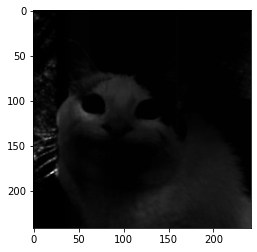

In [16]:
#max_pooling - пятиканальное изображение
print(max_pooling.shape)
plt.imshow(max_pooling[0], cmap='gray')